# 4. 30. Tues

인공신경망, 함수적 관계 통해서 인공지능 구현, 여러개의 입력, 출력 통해서 함수를 확장시키듯 확장 가능(네트워크)-확장으로 인한 복잡성을 단순하게 해주는 것이 행렬, 벡터입력-행렬이 함수의 역할-출력으로 벡터도출  ex) 1 by 4 * 4 by 2 = 1 by 2(행렬 곱의 조건 만족-dimension 조건의 일치)

ex) 수면시간, 운동시간, 칼로리 섭취량 등을 벡터로 투입-함수행렬거쳐서-결과 예측 벡터(체중, 혈압) 도출

함수행렬을 구하기 위해서는 많은 데이터가 필요함(big data)-좋은 함수 행렬을 구해야 좋은 결과 예측값을 얻을 수 있음: 데이터 투입시켜서 행렬의 값들을 바꾸어 나가면서(반복) 가장 좋은 행렬로 수렴하도록 찾아냄(epoch)

입력과 출력사이에 층위를 더할 수도 있음. 과정 중간에 벡터 하나 더 삽입 할 수 있음. - deep learning이라는 말의 유래(입력에서 출력으로 가는 중간단위 벡터가 많을 수록 deep)

응용) 음성인식(입력=음성,출력=텍스트), 음성합성(입력=텍스트, 출력=음성), 바둑(입력=현재의 바둑 상황, 출력=어디에 둘 것인가), 감정분석, 자동번역(입력=한 언어의 텍스트. 출력=다른 언어의 텍스트), 얼굴인식(입력=얼굴 이미지, 출력=identity) 등 : 입력과 출력이 무엇인지 잘 파악해야 함.

선형대수, 미적분 등의 수학 + 파이썬 코딩

regression.csv 파일 이용, x는 입력, y는 출력

# import modules

pandas : excel file 활용하는 module

numpy : matrix 활용하는 module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# data preparation and visualization

data variable에 regression.csv 파일 받음 - x variable과 y variable 분리 - visualization 을 통해 raw data의 pattern을 명확하게 볼 수 있음

         X      Y
0    3.300  1.700
1    4.400  2.760
2    5.500  2.090
3    6.710  3.190
4    6.930  1.694
5    4.168  1.573
6    9.779  3.366
7    6.182  2.596
8    7.590  2.530
9    2.167  1.221
10   7.042  2.827
11  10.791  3.465
12   5.313  1.650
13   7.997  2.904
14   5.654  2.420
15   9.270  2.940
16   3.100  1.300


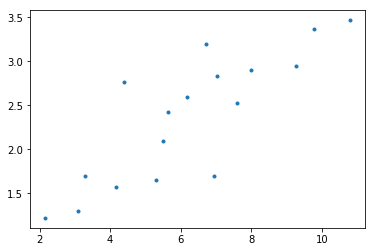

In [8]:
data = pd.read_csv('regression.csv')   # pd: excel 파일 불러오는 프로그램(module)
print(data)
X = data['X']
Y = data['Y']
plt.plot(X, Y, '.')

- a와 b를 구하는 것은 저 데이터들을 가장 잘 나타내는 직선(y=ax+b) 찾아내는 것, 현재는 입력하나 출력하나라서(2차원) 단순하지만, 입.출력의 갯수가 많아질수록 차원이 높아지고, 그렇게 되면 직선이 찾아지는 것이 아니다. 예를 들어 3차원인 경우-입력2, 출력1, 무한대의 '평면'이 model로 구해진다.

- 2차원의 data를 설명해주는 model은 직선, 즉 1차원 & 3차원의 data를 설명해주는 model은 평면, 즉 2차원

  따라서 구하는 model은 한 차원 낮다.

# create model

- model 껍데기 생성 : y = ax + b 형태의 model 제작(입력하나 출력하나 형태의 model만들 때 사용하면 됨), 추정해야 하는 parameter의 갯수 = 화살표의 갯수

- 입력 2개, 출력 1개인 형태의 model : y = ax1 + bx2 + c

- Dense(출력 갯수, input_shape=[입력갯수]), 모든 입.출력이 fully connected 된 것이라서 dense라고 명명

   ex. Dense(2, input_shape=[2])  : 입력 2개, 출력 2개 

In [10]:
model = Sequential()  # model의 시작, 입력벡터에서 출력벡터로 가는 것이 하나의 sequence, 현재 1개의 시퀀스만 필요
model.add(Dense(1, input_shape=[1])) # y의 갯수 1로 설정(출력1개), input shape에서 x의 갯수 1로 설정(입력1개) - 입력차원 하나,출력차원 하나
model.compile(optimizer="sgd", loss='mse')  # model을 닫음, optimizer: 함수행렬 통해 도출된 예측 output과 실제 output을 비교해가며 차이를 조정해가는 역할: sgd는 그 차이 조정 방법 중 하나
#loss: 예측된 출력값(output)과 정답값(target)과의 차이를 어떻게 계산할 것인가.mse는 여러 계산 방법 중 하나(mse: mean squre --: 오차의 제곱의 평균)

# train model

- 만들어진 껍데기 model을 가지고 있는 데이터로 학습시킴
- 처음에 입.출력값을 넣을 때는 아무 parameter나 들어가 있음. model을 통해 도출된 출력값(output)과 원래 data의 출력값(target)이 다를 것이다.(아무 parameter들어가 있으니까)-data를 많이 대입하면서 점차 parameter를 조절해 감(output과 target이 가까워지도록 차이를 조절) 
- 1 epoch : 가진 data를 한번 다 넣고 돌리는 것을 이파크 한번이라고 칭함.  ex. data 17개 1번 돌려서 학습시킴=1 epoch

In [21]:
model.fit(X, Y, epochs = 10)  # 총 17개의 데이터를 통해 적절한 함수행렬 a,b를 찾아내자. 
#가진 data를 10번 학습시키자. 여러번 돌릴수록 loss값이 낮아짐(loss가 작아지는 방향으로 수렴해감)

Epoch 1/10
17/17 [==============================] - 0s 19ms/sample - loss: 2.3803
Epoch 2/10
17/17 [==============================] - 0s 0s/sample - loss: 0.1938
Epoch 3/10
17/17 [==============================] - 0s 768us/sample - loss: 0.1732
Epoch 4/10
17/17 [==============================] - 0s 0s/sample - loss: 0.1730
Epoch 5/10
17/17 [==============================] - 0s 502us/sample - loss: 0.1729
Epoch 6/10
17/17 [==============================] - 0s 0s/sample - loss: 0.1728
Epoch 7/10
17/17 [==============================] - 0s 0s/sample - loss: 0.1727
Epoch 8/10
17/17 [==============================] - 0s 0s/sample - loss: 0.1726
Epoch 9/10
17/17 [==============================] - 0s 397us/sample - loss: 0.1725
Epoch 10/10
17/17 [==============================] - 0s 342us/sample - loss: 0.1724


# model prediction

만들고 훈련된 model이 어떠한지 체크, 원래 데이터와 새 데이터를 학습시킨 결과가 어떠한지 함께 visualize(plot)해서 확인 

prediction은 인공적으로 만들어진 것이므로 일직선형태, 데이터와 같은 경향을 보임=잘 학습되었음을 알 수 있음=앞으로 어떤 수를 투입해도 예측이 가능함

[[0.71880794]
 [1.0249015 ]
 [1.330995  ]
 [1.6370885 ]
 [1.943182  ]
 [2.2492754 ]
 [2.5553691 ]
 [2.8614626 ]
 [3.167556  ]
 [3.4736495 ]]


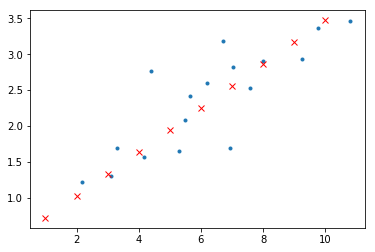

In [22]:
x = [1,2,3,4,5,6,7,8,9,10]   # 너무 동떨어진 값을 넣어서 test해 볼 필요는 없음
y = model.predict(x)   # x값에 대한 model을 통한 predict된 y값 찾음
print(y)
plt.plot(X, Y, '.')
plt.plot(x, y, 'rx')

# what are a and b in y = ax + b?

- a와 b가 무엇인지 궁금할 때 사용
- layer는 입출력 사이의 관계(화살표)

In [25]:
weights = model.layers[0].get_weights()    # 하나의 레이어만 만들었기 때문에 첫번째 밖에 없음(deep하게 만들지 않았음)
print(weights)

[array([[0.3060935]], dtype=float32), array([0.41271445], dtype=float32)]
